In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

In [2]:

# Заданная функция для y' = f(x, y)
def f(x, y):
    return x - y**2

In [3]:
# Параметры задачи
a, b = 0, 2  # Границы отрезка
y0 = 1       # Начальное условие
tol = 1e-4   # Заданная точность

In [4]:
# Шаг для метода Рунге-Кутта 4 порядка (с оценкой шага)
def runge_kutta4_step_size(f, a, b, y0, tol):
    x = a
    y = y0
    h = 0.1  # Начальный шаг
    steps = []

    while x < b:
        # Оценка двух шагов с h и одного шага с 2h для контроля точности
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y_rk4 = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        h2 = 2 * h
        k1_2h = h2 * f(x, y)
        k2_2h = h2 * f(x + h2 / 2, y + k1_2h / 2)
        k3_2h = h2 * f(x + h2 / 2, y + k2_2h / 2)
        k4_2h = h2 * f(x + h2, y + k3_2h)
        y_2h = y + (k1_2h + 2 * k2_2h + 2 * k3_2h + k4_2h) / 6

        delta = abs(y_rk4 - y_2h) / 15  # Оценка погрешности
        if delta > tol:
            h = h / 2
        else:
            steps.append((x, y))
            x += h
            y = y_rk4
            if delta < tol / 32:
                h = h * 2
    
    return np.array(steps)


In [5]:
# Метод Эйлера
def euler_method(f, a, b, y0, h):
    x_values = np.arange(a, b + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0
    for i in range(1, len(x_values)):
        y_values[i] = y_values[i - 1] + h * f(x_values[i - 1], y_values[i - 1])
    return x_values, y_values


In [6]:
# Решение задачи с помощью solve_ivp (точное решение)
sol = solve_ivp(f, [a, b], [y0], method='RK45', t_eval=np.linspace(a, b, 1000))

In [7]:
# Решение методом Рунге-Кутта 4-го порядка
rk4_steps = runge_kutta4_step_size(f, a, b, y0, tol)

In [8]:
# Решение методом Эйлера с шагом h = 0.1
h_euler = 0.1
euler_x, euler_y = euler_method(f, a, b, y0, h_euler)

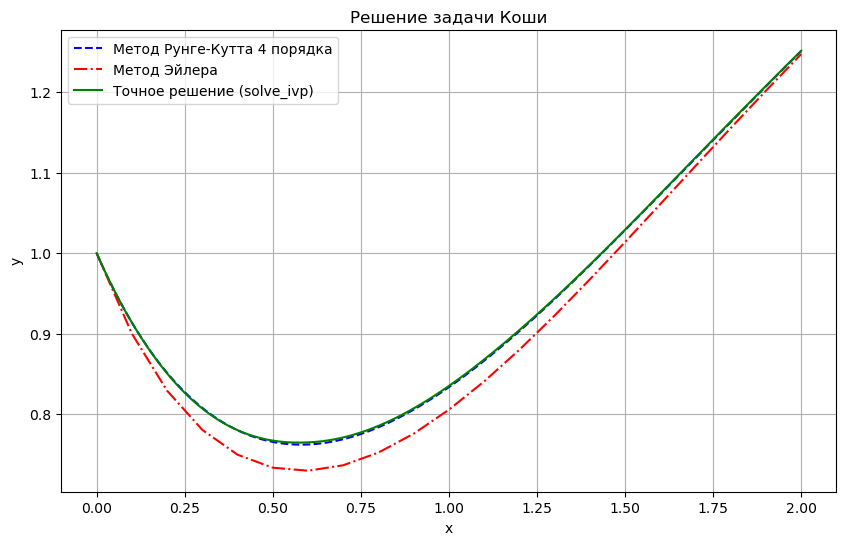

In [9]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(rk4_steps[:, 0], rk4_steps[:, 1], label='Метод Рунге-Кутта 4 порядка', color='blue', linestyle='--')
plt.plot(euler_x, euler_y, label='Метод Эйлера', color='red', linestyle='-.')
plt.plot(sol.t, sol.y[0], label='Точное решение (solve_ivp)', color='green')
plt.title('Решение задачи Коши')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Сравнение значений и отклонений в узловых точках
comparison = pd.DataFrame({
    'x': rk4_steps[:, 0],
    'Рунге-Кутта': rk4_steps[:, 1],
    'Эйлер': np.interp(rk4_steps[:, 0], euler_x, euler_y),
    'Точное решение': np.interp(rk4_steps[:, 0], sol.t, sol.y[0])
})

In [11]:
comparison['Отклонение РК4'] = abs(comparison['Рунге-Кутта'] - comparison['Точное решение'])
comparison['Отклонение Эйлер'] = abs(comparison['Эйлер'] - comparison['Точное решение'])
print(comparison)
print(f"Максимальное отклонение Рунге-Кутта: {comparison['Отклонение РК4'].max():.6f}")
print(f"Максимальное отклонение Эйлера: {comparison['Отклонение Эйлер'].max():.6f}")

             x  Рунге-Кутта     Эйлер  Точное решение  Отклонение РК4  \
0     0.000000     1.000000  1.000000        1.000000    0.000000e+00   
1     0.000781     0.999220  0.999219        0.999221    1.426455e-06   
2     0.001563     0.998441  0.998437        0.998442    1.025663e-06   
3     0.002344     0.997664  0.997656        0.997665    8.426390e-07   
4     0.003125     0.996890  0.996875        0.996891    1.465041e-06   
...        ...          ...       ...             ...             ...   
1088  1.985938     1.245201  1.241144        1.245673    4.719720e-04   
1089  1.989063     1.246561  1.242566        1.247030    4.682674e-04   
1090  1.992188     1.247921  1.243989        1.248385    4.646520e-04   
1091  1.995313     1.249279  1.245411        1.249740    4.610131e-04   
1092  1.998438     1.250637  1.246833        1.251094    4.574316e-04   

      Отклонение Эйлер  
0             0.000000  
1             0.000002  
2             0.000005  
3             0.000009 